<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Reddit NPL Classfication Challenge
Notebook 3: Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TFidFVectorizer

In [2]:
#jokes = pd.read_csv('../data/jokes.csv')
#jokes.head()
tales = pd.read_csv('../data/talesfromretail.csv')
tales.head()

,author,title,selftext,score,num_comments,upvote_ratio,created_utc,retrieved_on,subreddit
0,NormalDeviance,Fitting rooms are disgusting,"This isn’t so much of a single story, but more...",1,7,1.0,1602294153,1602294164,TalesFromRetail
1,NormalDeviance,Trying to return year-old worn shoes,Worked at a major department store at the retu...,1,12,1.0,1602288304,1602288315,TalesFromRetail
2,MaryCranberry,A cashier witnesses true love,I’m a cashier at a store at a ski resort. We h...,1,60,1.0,1602285068,1602285079,TalesFromRetail
3,tempthethrowaway,Follow My Brownies,"This is my wife's story from today, posted wit...",1,23,1.0,1602283980,1602283991,TalesFromRetail
4,[deleted],Customer is totally friends with a manager fro...,NaN,1,0,1.0,1602268197,1602268208,TalesFromRetail


In [3]:
print(f'Jokes shape {jokes.shape}')
print(f'Tales shape {tales.shape}')

Jokes shape (9526, 9)
Tales shape (9434, 9)


### Check Null

In [3]:
#jokes.isnull().sum()
tales.isnull().sum()

author             0
title              0
selftext           2
score              0
num_comments       0
upvote_ratio    8573
created_utc        0
retrieved_on       0
subreddit          0
dtype: int64

In [4]:
#tales.drop(columns = 'upvote_ratio', inplace = True)
jokes.drop(columns = 'upvote_ratio', inplace = True)

In [5]:
#jokes[jokes['selftext'].isnull()]
tales[tales['selftext'].isnull()]

,author,title,selftext,score,num_comments,created_utc,retrieved_on,subreddit
4,[deleted],Customer is totally friends with a manager fro...,NaN,1,0,1602268197,1602268208,TalesFromRetail
180,PlasmaCarrot79,Super Soaker,NaN,1,0,1598471414,1598471425,TalesFromRetail


In [6]:
#jokes.drop([440, 1598, 8557], inplace = True)
tales.drop([4, 180], inplace =True)

In [7]:
#jokes[jokes.author == '[deleted]']
tales[tales.author == '[deleted]']

,author,title,selftext,score,num_comments,created_utc,retrieved_on,subreddit
218,[deleted],Changing room horror story,[deleted],1,0,1597791303,1597791314,TalesFromRetail


In [8]:
#jokes.drop(33, inplace = True)
tales.drop(218, inplace = True)

In [9]:
#jokes[jokes.selftext == '[deleted]']
tales[tales.selftext == '[deleted]']

,author,title,selftext,score,num_comments,created_utc,retrieved_on,subreddit


In [10]:
print(f'Jokes shape {jokes.shape}')
print(f'Tales shape {tales.shape}')

Jokes shape (9522, 8)
Tales shape (9431, 8)


### EDA

In [24]:
jokes.num_comments.describe()

count    9522.000000
mean        6.393195
std        47.729355
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max      1821.000000
Name: num_comments, dtype: float64

In [32]:
jokes.num_comments.sort_values(ascending = False)

3692    1821
7253    1738
3206    1195
861     1099
8372    1055
        ... 
6460    0   
2623    0   
2622    0   
6461    0   
9525    0   
Name: num_comments, Length: 9522, dtype: int64

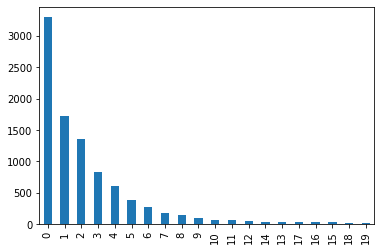

In [23]:
jokes.num_comments.value_counts()[:20].plot.bar();

In [30]:
pd.set_option('display.max_colwidth', 0)

In [31]:
jokes[jokes.num_comments == 1738]

,author,title,selftext,score,num_comments,created_utc,retrieved_on,subreddit
7253,cyclopropagative,"I’m American, and I’m sick of people saying America is “the stupidest country in the world.”","Personally, I think Europe is the stupidest country in the world.",1,1738,1600861225,1600861235,Jokes
